# 포심 패스트볼

포심 패스트볼 데이터로 공의 회전수, 구속, 타구 속도 등의 관계를 확인해보는 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## 1. FF (포심 패스트볼)

In [2]:
ff = pd.read_csv('2021_ff.csv')

In [3]:
ff.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,1866,592662,"Ray, Robbie",3141,59.4,0.222,0.208,0.252,0.431,0.307,0.326,0.243,96.0,432.0,90.8,21.8,2272,94.8,94.79,239,997,869,0.0,6.48,106,154,120,147,298,319,290
1,1697,641816,"Mahle, Tyler",3196,53.1,0.236,0.199,0.341,0.435,0.334,0.307,0.215,78.0,331.0,88.0,16.9,2335,94.0,94.41,209,776,921,0.4,6.61,113,153,117,148,293,318,290
2,1538,592332,"Gausman, Kevin",3002,51.2,0.257,0.157,0.293,0.415,0.317,0.351,0.277,95.0,369.0,89.9,16.6,2281,94.6,94.60,154,816,722,0.0,6.48,111,155,114,150,298,323,295
3,1442,457918,"Happ, J.A.",2674,53.9,0.266,0.266,0.294,0.532,0.377,0.365,0.255,78.0,293.0,91.7,24.0,2298,91.0,90.72,136,671,771,-0.3,6.12,106,154,116,148,299,327,295
4,1403,621111,"Buehler, Walker",3152,44.5,0.202,0.164,0.241,0.366,0.292,0.330,0.241,58.0,287.0,89.3,16.9,2472,95.3,95.53,127,627,776,0.2,6.39,113,156,116,151,298,319,294


### 1-1 구속 vs 회전수

#### 데이터 정리

In [4]:
# 최소 투구수 50개 이상 데이터만 추출
ff_100 = ff[ff['pitches']>100]

In [5]:
ff_100[['velocity','spin_rate']].describe()

,velocity,spin_rate
count,513.000000,513.000000
mean,93.569006,2264.222222
std,2.226175,148.748258
min,82.700000,1769.000000
25%,92.400000,2164.000000
50%,93.700000,2259.000000
75%,95.000000,2363.000000
max,99.200000,2783.000000


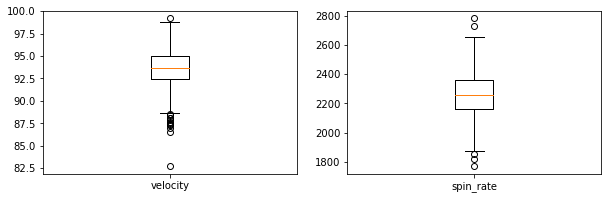

In [6]:
# box plot으로 outlier 확인
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(ff_100['velocity'])
plt.xticks([1], ['velocity'])
plt.subplot(1,2,2)
plt.boxplot(ff_100['spin_rate'])
plt.xticks([1], ['spin_rate'])
plt.show()

In [7]:
# outlier 제거
ff_2021 = ff_100[(ff_100['velocity']<98) & (ff_100['velocity']>88)]
ff_2021 = ff_2021[(ff_2021['spin_rate']<2650) & (ff_2021['spin_rate']>1850)]

In [8]:
lg_total_pitch = ff_2021['pitches'].sum()
lg_total_speed = ff_2021['pitches']*ff_2021['velocity']
lg_mean_ff_speed = lg_total_speed.sum() / lg_total_pitch
print('21 리그 FF 평균 구속 = {0} mph'.format(lg_mean_ff_speed.round(2)))

21 리그 FF 평균 구속 = 93.76 mph


In [9]:
lg_total_pitch = ff_2021['total_pitches'].sum()
lg_total_spin = ff_2021['total_pitches']*ff_2021['spin_rate']
lg_mean_ff_spin = lg_total_spin.sum() / lg_total_pitch
print('21 리그 FF 평균 Spin Rate = {0} rpm'.format(lg_mean_ff_spin.round(2)))

21 리그 FF 평균 Spin Rate = 2267.17 rpm


#### Spin_rate 상위 그룹과 하위 그룹 구속 비교

In [10]:
ff_2021[['velocity','spin_rate']].describe()

,velocity,spin_rate
count,494.000000,494.000000
mean,93.623279,2265.763158
std,1.978988,139.655090
min,88.100000,1874.000000
25%,92.500000,2168.000000
50%,93.700000,2260.500000
75%,94.900000,2362.750000
max,97.800000,2613.000000


In [11]:
# 상위 25%, 하위 25%
high_spin = ff_2021[ff_2021['spin_rate']>=2362.75]
low_spin = ff_2021[ff_2021['spin_rate']<=2168]

In [12]:
high_total_pitch = high_spin['pitches'].sum()
high_total_speed = high_spin['pitches']*high_spin['velocity']
high_mean_ff_speed = high_total_speed.sum() / high_total_pitch
print('21 리그 상위 25% spin rate 선수들({1}명)의 FF 평균 구속 = {0} mph'.format(high_mean_ff_speed.round(2), len(high_spin)))

21 리그 상위 25% spin rate 선수들(124명)의 FF 평균 구속 = 94.48 mph


In [13]:
low_total_pitch = low_spin['pitches'].sum()
low_total_speed = low_spin['pitches']*low_spin['velocity']
low_mean_ff_speed = low_total_speed.sum() / low_total_pitch
print('21 리그 하위 25% spin rate 선수들({1}명)의 FF 평균 구속 = {0} mph'.format(low_mean_ff_speed.round(2), len(low_spin)))

21 리그 하위 25% spin rate 선수들(125명)의 FF 평균 구속 = 93.26 mph


#### Plotting

예상대로 공의 회전 수가 높은 그룹이 평균적으로 높은 구속을 나타내었다.

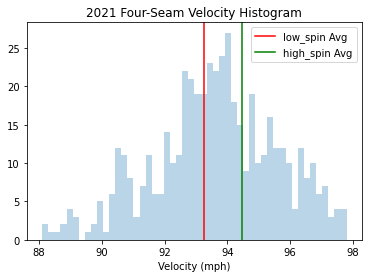

In [14]:
plt.hist(ff_2021['velocity'], bins=50, alpha=0.3)
plt.axvline(low_mean_ff_speed, c='r', label='low_spin Avg')
plt.axvline(high_mean_ff_speed, c='g', label='high_spin Avg')
plt.legend()
plt.title('2021 Four-Seam Velocity Histogram')
plt.xlabel('Velocity (mph)')
plt.show()

#### Regression 1-1

공의 회전수(spin_rate)와 구속(velocity)의 관계를 산점도로 확인해보았다. 선형 회귀식으로 관계를 나타내었을 때 양의 상관관계를 나타내었고, 통계적으로 유의한 결과지만 R스퀘어가 낮게 측정되었다.   
   
두 변수가 양의 상관관계가 있다는 것은 회전수가 높아질수록 구속이 빨라지는 경향이 있음을 의미한다. 회귀식에 의하며, 회전수(spin_rate)가 100rpm이 오르면, 구속은 0.33mph 증가한다.

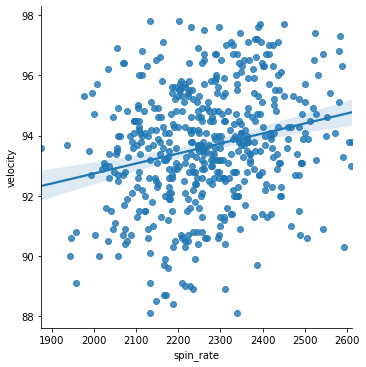

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               velocity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     28.55
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.40e-07
Time:                        22:50:34   Log-Likelihood:                -1023.7
No. Observations:                 494   AIC:                             2051.
Df Residuals:                     492   BIC:                             2060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.1042      1.410     61.071      0.000      83.334      88.874
spin_rate      0.0033      0.001      5.343      0.000       0.002       0.005
==============================================================================
Omnibus:                        4.937   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.916
Skew:                          -0.215   Prob(JB):                       0.0856
Kurtosis:                       2.769   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
import statsmodels.formula.api as smf
import seaborn as sns

sns.lmplot(x='spin_rate', y='velocity', data=ff_2021)
plt.show()
reg_1 = smf.ols(formula = 'velocity ~ spin_rate', data=ff_2021).fit()
reg_1.summary()

#### Regression 1-2

공의 회전수(spin_rate)와 피안타율(ba)의 관계를 산점도로 확인해보았다. 선형 회귀식으로 관계를 나타내었을 때 구속과는 반대로 음의 상관관계를 나타내었다. 마찬가지로 통계적으로 유의했지만, R스퀘어가 낮게 계산되었다.   
   
두 변수가 음의 상관관계가 있다는 것은 회전수가 높아질수록 피안타율이 낮아지는 경향이 있음을 의미한다. 회귀식에 의하며, 회전수(spin_rate)가 100rpm이 오르면, 피안타율은 약 0.01감소한다.

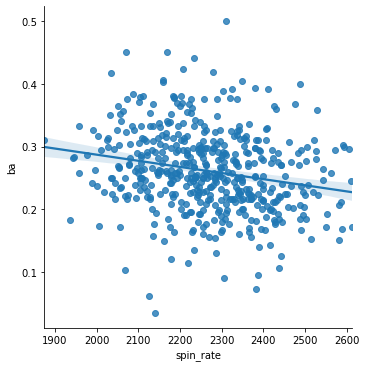

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ba   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     22.46
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.81e-06
Time:                        22:50:34   Log-Likelihood:                 659.00
No. Observations:                 494   AIC:                            -1314.
Df Residuals:                     492   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4822      0.047     10.313      0.000       0.390       0.574
spin_rate  -9.763e-05   2.06e-05     -4.740      0.000      -0.000   -5.72e-05
==============================================================================
Omnibus:                        9.276   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               14.167
Skew:                           0.108   Prob(JB):                     0.000839
Kurtosis:                       3.801   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
sns.lmplot(x='spin_rate', y='ba', data=ff_2021)
plt.show()
reg_2 = smf.ols(formula = 'ba ~ spin_rate', data=ff_2021).fit()
reg_2.summary()

# 

## 2-1 구속 vs 타구 속도(launch_speed)

In [17]:
ff_100[['velocity','launch_speed']].describe()

,velocity,launch_speed
count,513.000000,513.000000
mean,93.569006,90.126511
std,2.226175,2.829656
min,82.700000,79.000000
25%,92.400000,88.500000
50%,93.700000,90.200000
75%,95.000000,91.900000
max,99.200000,97.900000


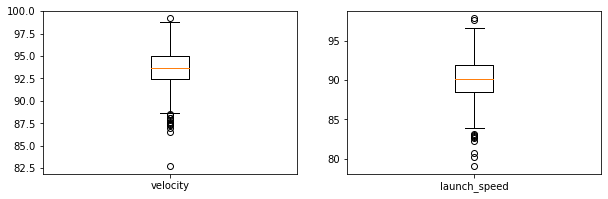

In [18]:
# box plot으로 outlier 확인
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(ff_100['velocity'])
plt.xticks([1], ['velocity'])
plt.subplot(1,2,2)
plt.boxplot(ff_100['launch_speed'])
plt.xticks([1], ['launch_speed'])
plt.show()

In [19]:
# outlier 제거
v_ls = ff_100[(ff_100['velocity']<98) & (ff_100['velocity']>88)]
v_ls = v_ls[(v_ls['launch_speed']<97) & (v_ls['launch_speed']>83)]

In [20]:
v_ls[['velocity','launch_speed']].describe()

,velocity,launch_speed
count,488.000000,488.000000
mean,93.628279,90.286475
std,1.979665,2.591271
min,88.100000,83.100000
25%,92.500000,88.600000
50%,93.700000,90.350000
75%,94.900000,91.925000
max,97.800000,96.600000


In [21]:
# 구속 상위 25%, 하위 25%
high_v = v_ls[v_ls['velocity']>=94.9]
low_v = v_ls[v_ls['velocity']<=92.5]

In [22]:
high_v_pitch = high_v['pitches'].sum()
high_total_launch_speed = high_v['pitches']*high_v['launch_speed']
high_mean_ff_launch_speed = high_total_launch_speed.sum() / high_v_pitch
print('21 리그 상위 25% FF 구속 선수들({1}명)의 평균 타구 속도 = {0} mph'.format(high_mean_ff_launch_speed.round(2), len(high_spin)))

low_v_pitch = low_v['pitches'].sum()
low_total_launch_speed = low_v['pitches']*low_v['launch_speed']
low_mean_ff_launch_speed = low_total_launch_speed.sum() / low_v_pitch
print('21 리그 하위 25% FF 구속 선수들({1}명)의 평균 타구 속도 = {0} mph'.format(low_mean_ff_launch_speed.round(2), len(low_spin)))

21 리그 상위 25% FF 구속 선수들(124명)의 평균 타구 속도 = 90.5 mph
21 리그 하위 25% FF 구속 선수들(125명)의 평균 타구 속도 = 90.01 mph


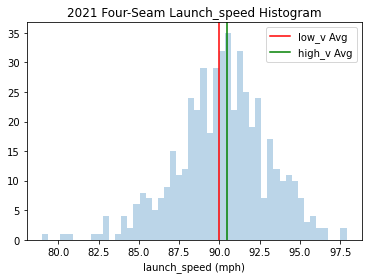

In [23]:
plt.hist(ff_2021['launch_speed'], bins=50, alpha=0.3)
plt.axvline(low_mean_ff_launch_speed, c='r', label='low_v Avg')
plt.axvline(high_mean_ff_launch_speed, c='g', label='high_v Avg')
plt.legend()
plt.title('2021 Four-Seam Launch_speed Histogram')
plt.xlabel('launch_speed (mph)')
plt.show()

#### Regression 2-1

공의 속도(velocity)와 타구 속도(launch_speed)의 관계를 산점도로 확인해보았다. 선형 회귀식으로 관계를 나타내었을 때 양의 상관관계를 나타내었지만, 통계적 유의성이 없었다.
   
일반적으로 빠른 공이 배트에 맞았을 때, 타구 속도도 빠르게 나올 것이라고 예상하지만 공의 속도와 타구 속도는 연관성이 없었다. 실제로, 타구 속도는 투수가 던지는 공보다 타자에 의해 영향을 훨씬 더 많이 받는다고 한다. (홈런 더비에서도 투수는 90mph 이하의 느린 공을 던지지만, 타자들은 강한 타구로 쳐낸다.)

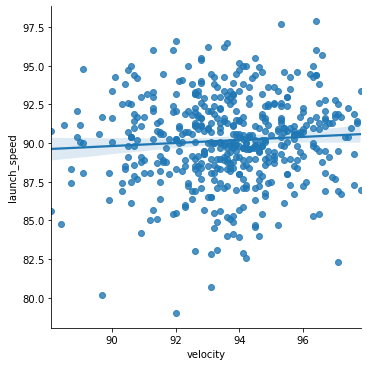

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           launch_speed   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.336
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.127
Time:                        22:50:35   Log-Likelihood:                -1214.4
No. Observations:                 494   AIC:                             2433.
Df Residuals:                     492   BIC:                             2441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.9435      6.038     13.406      0.000      69.081      92.806
velocity       0.0985      0.064      1.528      0.127      -0.028       0.225
==============================================================================
Omnibus:                       16.200   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.583
Skew:                          -0.364   Prob(JB):                     9.22e-05
Kurtosis:                       3.609   Cond. No.                     4.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
sns.lmplot(x='velocity', y='launch_speed', data=ff_2021)
plt.show()
reg_1 = smf.ols(formula = 'launch_speed ~ velocity', data=ff_2021).fit()
reg_1.summary()